In [121]:
%matplotlib inline 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import math

In [122]:
a = 1
b = 1
def ode(phi,t):

    dphi = -(a * np.sin(phi) + 2 * b * np.sin(2*phi))

    return dphi

In [123]:
times = np.arange(0, 10, .1) # Times
ic = [1/2 * math.pi] # Initial condition for first orbit
ic2 = [-5/6 * math.pi]
orbit = odeint(ode, ic, times)
orbit2 = odeint(ode, ic2, times) # Second orbit

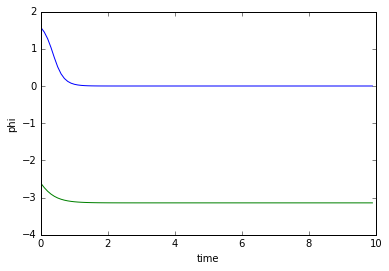

In [124]:
plt.plot(times, orbit[:,0]); # Plot the orbit
plt.plot(times, orbit2[:,0], 'g'); # Plot the second orbit
plt.ylabel("phi");
plt.xlabel("time");

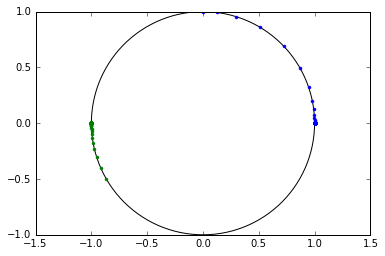

In [125]:
circle = np.linspace(-math.pi,math.pi,360)
plt.plot(np.cos(circle),np.sin(circle),'k')
plt.axis('equal')
plt.plot(np.cos(orbit), np.sin(orbit),'b.')
plt.plot(np.cos(orbit2), np.sin(orbit2),'g.')

In [126]:
# Somewhat arbitrary projection to 3d to get the right topology, and so it looks nice
omega = 2
def project_to_r3(times, orbit):
    ret_orbit = np.empty([len(times),3])
    for i,t in enumerate(times):
        x = (3.0 + np.cos(omega * t + orbit[i])) * np.cos(omega*t)
        y = (3.0 + np.cos(omega * t + orbit[i])) * np.sin(omega*t)
        z = np.sin(omega * t + orbit[i])   
        ret_orbit[i] = [x, y, z]
    return ret_orbit

In [141]:
def circle(times, orbit):
    ret_orbit = np.empty([len(times),3])
    for i,t in enumerate(times):
        x = 3.0 * np.cos(omega*t)
        y = 3.0 * np.sin(omega*t)
        z = 0
        ret_orbit[i] = [x, y, z]
    return ret_orbit

In [144]:
proj_orbit1 = project_to_r3(times,orbit)
proj_orbit2 = project_to_r3(times,orbit2)

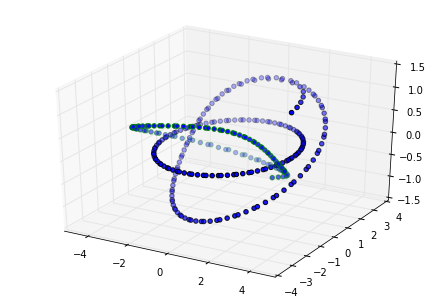

In [145]:
# %matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

# Plot reference
circle2 = circle(times,orbit)
ax.scatter(circle2[:,0],circle2[:,1],circle2[:,2])

# Plot the orbit
ax.scatter(proj_orbit1[:,0],proj_orbit1[:,1],proj_orbit1[:,2])
ax.scatter(proj_orbit2[:,0],proj_orbit2[:,1],proj_orbit2[:,2], color="green")

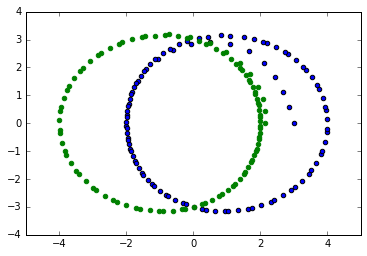

In [147]:
plt.scatter(proj_orbit1[:,0],proj_orbit1[:,1])
plt.scatter(proj_orbit2[:,0],proj_orbit2[:,1], color="green")